### Regressão
Analisar o dataset 'boston' disponibilizado na pasta data, criar um modelo de regressão para os dados e avaliar as métricas

#### Importando bibliotecas

In [23]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 

### Avaliação de métricas
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### Leitura de dados

In [24]:
data = pd.read_csv("data/boston.csv")
data.head() # imprimir 5 primeiros registros

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
data.rename(columns = {"MEDV":"TARGET"}, inplace = True) # Renomeando coluna alvo
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Análise exploratória

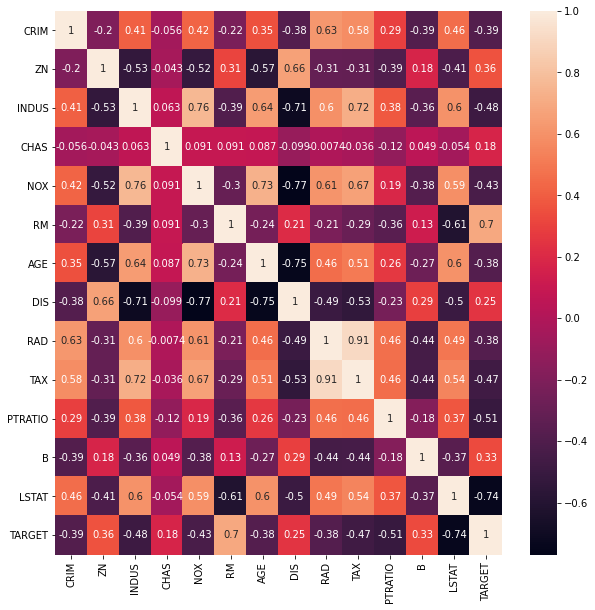

In [26]:
# Correlação
corr = data.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)
plt.show()

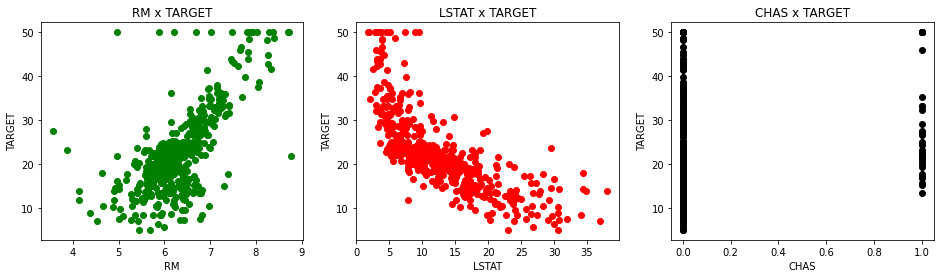

In [27]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.scatter(data["RM"], data["TARGET"], color = "green")
plt.title("RM x TARGET")
plt.xlabel("RM")
plt.ylabel("TARGET")

plt.subplot(1,3,2)
plt.scatter(data["LSTAT"], data["TARGET"], color = "red")
plt.title("LSTAT x TARGET")
plt.xlabel("LSTAT")
plt.ylabel("TARGET")

plt.subplot(1,3,3)
plt.scatter(data["CHAS"], data["TARGET"], color = "black")
plt.title("CHAS x TARGET")
plt.xlabel("CHAS")
plt.ylabel("TARGET")

plt.show()

#### Definição do modelo e treino

In [45]:
# instanciando modelos
tree = DecisionTreeRegressor()
linear = LinearRegression()
svm = SVR(kernel = 'linear')

In [46]:
# Separando dados
## Variáveis preditoras
X = data.iloc[:,0:13]
X = np.array(X)

## Variável alvo
y = data.iloc[:,13]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (404, 13)
Tamanho X de teste: (102, 13)
Tamanho y de treino: (404,)
Tamanho y de teste: (102,)


In [47]:
# Treinando modelos
tree.fit(X_train, y_train)

linear.fit(X_train, y_train)

svm.fit(X_train, y_train)

SVR(kernel='linear')

#### Testando e avaliando modelos

In [48]:
# Prevendo valores
tree_predict = tree.predict(X_test)

linear_predict = linear.predict(X_test)

svm_predict = svm.predict(X_test)

In [49]:
# Avaliação R2
tree_score = r2_score(y_test, tree_predict)
linear_score = r2_score(y_test, linear_predict)
svm_score = r2_score(y_test, svm_predict)

print(f"Pontuação R2 Decision Tree: {tree_score}")
print(f"Pontuação R2 Linear Regression: {linear_score}")
print(f"Pontuação R2 Support Vector Regressor: {svm_score}")

Pontuação R2 Decision Tree: 0.6209326483388188
Pontuação R2 Linear Regression: 0.5892223849182514
Pontuação R2 Support Vector Regressor: 0.5159547464307443


In [50]:
# Validação cruzada
tree_score_cv = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 5)
linear_score_cv = cross_val_score(estimator = linear, X = X_train, y = y_train, cv = 5)
svm_score_cv = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 5)

print(f"Validação cruzada Decision Tree:{tree_score_cv.mean()}")
print(f"Validação cruzada Linear Regression:{linear_score_cv.mean()}")
print(f"Validação cruzada Support Vector Regressor:{svm_score_cv.mean()}")

Validação cruzada Decision Tree:0.7858063761591524
Validação cruzada Linear Regression:0.748677200760428
Validação cruzada Support Vector Regressor:0.7394032889863928


In [51]:
# RMSE error
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predict))
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predict))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predict))

print(f"Pontuação R2 Decision Tree: {tree_rmse}")
print(f"Pontuação R2 Linear Regression: {linear_rmse}")
print(f"Pontuação R2 Support Vector Regressor: {svm_rmse}")

Pontuação R2 Decision Tree: 5.5557954196584705
Pontuação R2 Linear Regression: 5.783509315085131
Pontuação R2 Support Vector Regressor: 6.27814060319341


In [52]:
# Results dataframe
results = pd.DataFrame()
results["Model"] = ["DecisionTree", "LinearRegression", "SupportVectRegressor"]
results["R2"] = [tree_score, linear_score, svm_score]
results["CV"] = [tree_score_cv.mean(), linear_score_cv.mean(), svm_score_cv.mean()]
results["RMSE"] = [tree_rmse, linear_rmse, svm_rmse]

results

,Model,R2,CV,RMSE
0,DecisionTree,0.620933,0.785806,5.555795
1,LinearRegression,0.589222,0.748677,5.783509
2,SupportVectRegressor,0.515955,0.739403,6.278141


#### Analisando predições

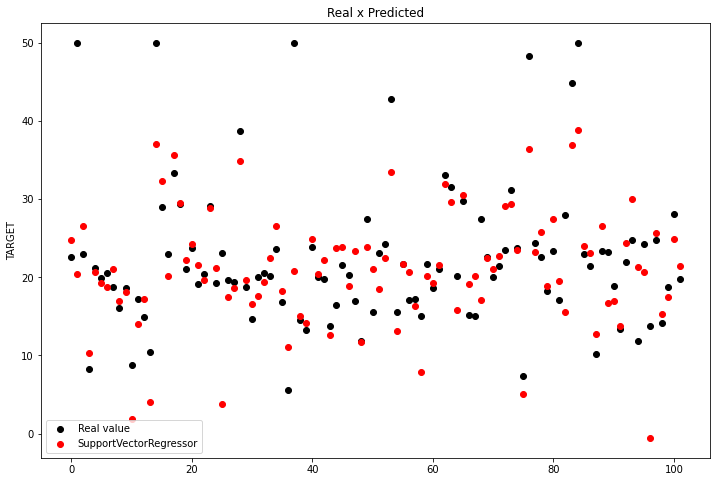

In [55]:
plt.figure(figsize=(12,8))

x_ = np.arange(len(y_test))

plt.scatter(x = x_, y = y_test, color = "black", label = "Real value")
plt.scatter(x = x_, y = tree_predict, color = "green", label = "DecisionTree")
plt.scatter(x = x_, y = linear_predict, color = "blue", label = "LinearRegression")
plt.scatter(x = x_, y = svm_predict, color = "red", label = "SupportVectorRegressor")

plt.legend()
plt.ylabel("TARGET")
plt.title("Real x Predicted")
plt.show()